In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [6]:
import pickle

In [7]:
df = pd.read_csv('Train.csv')

In [8]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


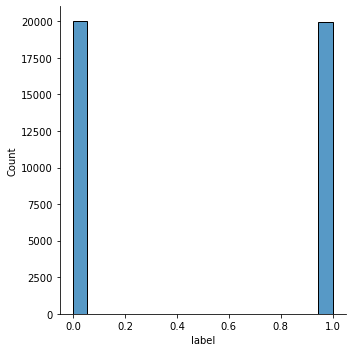

In [9]:
sns.displot(df, x="label")

In [10]:
df.info

<bound method DataFrame.info of                                                     text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]>

In [11]:
documents = []
all_words = []
for ind in df.index:
    review = df['text'][ind]
    word_in_rev = word_tokenize(review)
    for w in word_in_rev:
        all_words.append(w.lower())
    category_in_rev = df['label'][ind]
    documents.append((word_in_rev, category_in_rev))

In [12]:
all_words = nltk.FreqDist(all_words)

In [13]:
words_as_feats = list(all_words.keys())[:5000]

In [14]:
def find_features(review):
    words_in_doc = set(review)
    features = {}
    for w in words_as_feats:
        features[w] = (w in words_in_doc)
    return features

In [15]:
featuresets = [(find_features(rev), category) for (rev, category) in documents]

In [16]:
df_test = pd.read_csv('Test.csv')
document_test = []
for ind in df_test.index:
    review = df_test['text'][ind]
    word_in_rev = word_tokenize(review)
    category_in_rev = df_test['label'][ind]
    document_test.append((word_in_rev, category_in_rev))
testing_set = [(find_features(rev), category) for (rev, category) in document_test]

In [17]:
clf = nltk.NaiveBayesClassifier.train(featuresets)
print(nltk.classify.accuracy(clf, testing_set))

0.84


In [23]:
save_clf = open("ReviewClassifier_NaiveBayes.pickle", 'wb')
pickle.dump(clf, save_clf)
save_clf.close

<function BufferedWriter.close>

In [24]:
clf.show_most_informative_features(20)

Most Informative Features
                    3/10 = True                0 : 1      =     70.0 : 1.0
                    4/10 = True                0 : 1      =     35.6 : 1.0
                 stinker = True                0 : 1      =     26.9 : 1.0
                    7/10 = True                1 : 0      =     25.2 : 1.0
                  wrists = True                0 : 1      =     15.0 : 1.0
                   waste = True                0 : 1      =     14.8 : 1.0
                 unfunny = True                0 : 1      =     12.3 : 1.0
              unengaging = True                0 : 1      =     11.6 : 1.0
             whatsoever. = True                0 : 1      =     10.7 : 1.0
            half-hearted = True                0 : 1      =     10.6 : 1.0
                   worst = True                0 : 1      =      9.8 : 1.0
             half-decent = True                0 : 1      =      9.6 : 1.0
              uninspired = True                0 : 1      =      9.3 : 1.0